# Final Project Big Data

#### Authors :
2010512054 Baihaqi Firdaus <br>
2010512061 Andhika Rizq Pulubuhu <br>
2010512062 Nicodemus Naisau<br>
2010512063 Santiana<br>
2010512067 Fitri Kurniawati<br>

<img src="https://stiesia.ac.id/wp-content/uploads/2021/11/hari-diabetes-sedunia-04.jpg">

____

# Run a SparkSession

In [1]:
import findspark
findspark.init()
findspark.find()

'D:\\APP\\Anaconda\\lib\\site-packages\\pyspark'

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('lr_example').getOrCreate()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [4]:
df = spark.read.csv('diabetes.csv',header=True,inferSchema=True)

In [5]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          2|    138|           62|           35|      0|33.6|                   0.127| 47|      1|
|          0|     84|           82|           31|    125|38.2|                   0.233| 23|      0|
|          0|    145|            0|            0|      0|44.2|                    0.63| 31|      1|
|          0|    135|           68|           42|    250|42.3|                   0.365| 24|      1|
|          1|    139|           62|           41|    480|40.7|                   0.536| 21|      0|
|          0|    173|           78|           32|    265|46.5|                   1.159| 58|      0|
|          4|     99|           72|           17|      0|25.6|                   0.294| 28|      0|


In [6]:
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [7]:
df.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  684|
|      0| 1316|
+-------+-----+



In [8]:
df.describe().show()

+-------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------------+------------------+------------------+
|summary|      Pregnancies|           Glucose|     BloodPressure|    SkinThickness|          Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------------+------------------+------------------+
|  count|             2000|              2000|              2000|             2000|             2000|              2000|                    2000|              2000|              2000|
|   mean|           3.7035|          121.1825|           69.1455|           20.935|           80.254|32.192999999999984|     0.47092999999999974|           33.0905|             0.342|
| stddev|3.306063032730656|32.068635649902916|19.188314815604098|16.103242909926

# Cleaning Data

In [9]:
for col in df.columns:
  print(col+":",df[df[col].isNull()].count())

Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 0


In [10]:
def count_zeros():
  columns_list =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
  for i in columns_list:
    print(i+":",df[df[i]==0].count())

In [11]:
count_zeros()

Glucose: 13
BloodPressure: 90
SkinThickness: 573
Insulin: 956
BMI: 28


In [12]:
from pyspark.sql.functions import *
for i in df.columns[1:6]:
  data = df.agg({i:'mean'}).first()[0]
  print("Mean value for {} is {}".format(i,int(data)))
  df = df.withColumn(i,when(df[i]==0,int(data)).otherwise(df[i]))

Mean value for Glucose is 121
Mean value for BloodPressure is 69
Mean value for SkinThickness is 20
Mean value for Insulin is 80
Mean value for BMI is 32


In [13]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          2|    138|           62|           35|     80|33.6|                   0.127| 47|      1|
|          0|     84|           82|           31|    125|38.2|                   0.233| 23|      0|
|          0|    145|           69|           20|     80|44.2|                    0.63| 31|      1|
|          0|    135|           68|           42|    250|42.3|                   0.365| 24|      1|
|          1|    139|           62|           41|    480|40.7|                   0.536| 21|      0|
|          0|    173|           78|           32|    265|46.5|                   1.159| 58|      0|
|          4|     99|           72|           17|     80|25.6|                   0.294| 28|      0|


In [14]:
def histogram(df, col, bins=10, xname=None, yname=None):
    
    '''
    This function makes a histogram from spark dataframe named 
    df for column name col. 
    '''
    
    # Calculating histogram in Spark 
    vals = df.select(col).rdd.flatMap(lambda x: x).histogram(bins)
    
    # Preprocessing histogram points and locations 
    width = vals[0][1] - vals[0][0]
    loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]
    
    # Making a bar plot 
    plt.bar(loc, vals[1], width=width)
    plt.xlabel(col)
    plt.ylabel(yname)
    plt.show()

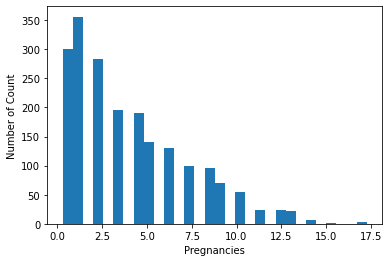

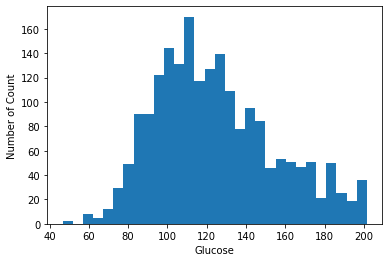

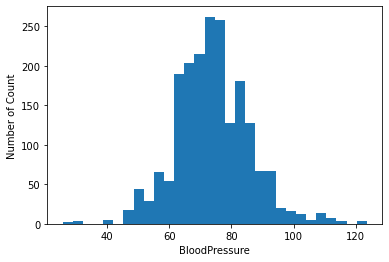

In [15]:
histogram(df, 'Pregnancies', bins=30, yname='Number of Count')
histogram(df, 'Glucose', bins=30, yname='Number of Count')
histogram(df, 'BloodPressure', bins=30, yname='Number of Count')

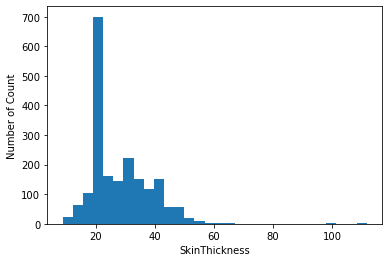

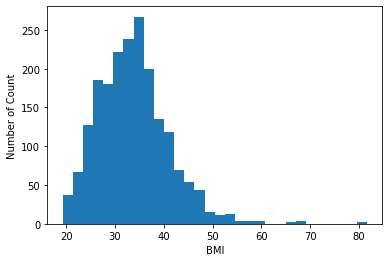

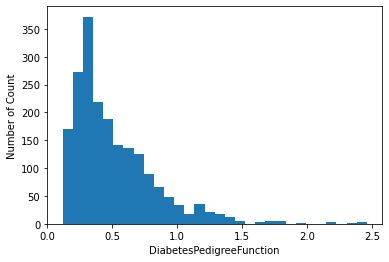

In [16]:
histogram(df, 'SkinThickness', bins=30, yname='Number of Count')
histogram(df, 'BMI', bins=30, yname='Number of Count')
histogram(df, 'DiabetesPedigreeFunction', bins=30, yname='Number of Count')

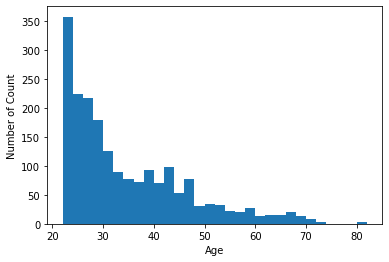

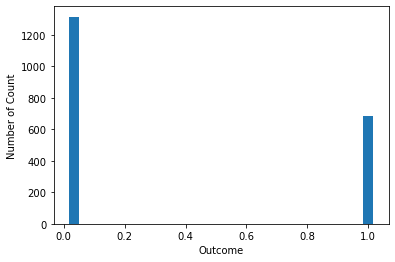

In [17]:
histogram(df, 'Age', bins=30, yname='Number of Count')
histogram(df, 'Outcome', bins=30, yname='Number of Count')

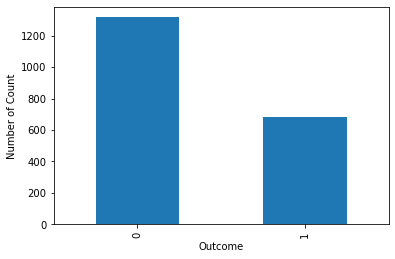

In [18]:
def barplot(df, col, lim=10, yname=None):
    
    '''
    This function makes a bar plot for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()
    
    
barplot(df, 'Outcome', lim=30, yname='Number of Count')

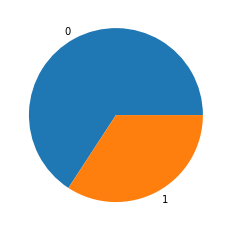

In [19]:
def pieplot(df, col, lim=10, yname=None):
    
    '''
    This function makes a pie chart for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False)
    plt.ylabel(None)
    plt.show()
    
pieplot(df, 'Outcome') 

# Correlation

In [20]:
for col in df.columns:
  print("correlation to outcome for {} is {}".format(col,df.stat.corr('Outcome',col)))

correlation to outcome for Pregnancies is 0.22443699263363961
correlation to outcome for Glucose is 0.48796646527321064
correlation to outcome for BloodPressure is 0.17171333286446713
correlation to outcome for SkinThickness is 0.1659010662889893
correlation to outcome for Insulin is 0.1711763270226193
correlation to outcome for BMI is 0.2827927569760082
correlation to outcome for DiabetesPedigreeFunction is 0.1554590791569403
correlation to outcome for Age is 0.23650924717620253
correlation to outcome for Outcome is 1.0


# Feature Selection

In [21]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],outputCol='features')
output_data = assembler.transform(df)

In [22]:
output_data.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)
 |-- features: vector (nullable = true)



In [23]:
output_data.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|          2|    138|           62|           35|     80|33.6|                   0.127| 47|      1|[2.0,138.0,62.0,3...|
|          0|     84|           82|           31|    125|38.2|                   0.233| 23|      0|[0.0,84.0,82.0,31...|
|          0|    145|           69|           20|     80|44.2|                    0.63| 31|      1|[0.0,145.0,69.0,2...|
|          0|    135|           68|           42|    250|42.3|                   0.365| 24|      1|[0.0,135.0,68.0,4...|
|          1|    139|           62|           41|    480|40.7|                   0.536| 21|      0|[1.0,139.0,62.0,4...|
|          0|    173|           

# Build & Train Model

## LogisticRegression

In [24]:
from pyspark.ml.classification import LogisticRegression
final_data = output_data.select('features','Outcome')

In [25]:
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Outcome: integer (nullable = true)



In [26]:
train , test = final_data.randomSplit([0.7,0.3])
models = LogisticRegression(labelCol='Outcome')
model = models.fit(train)

In [27]:
summary = model.summary

In [28]:
summary.predictions.describe().show()

+-------+-------------------+-------------------+
|summary|            Outcome|         prediction|
+-------+-------------------+-------------------+
|  count|               1399|               1399|
|   mean| 0.3459614010007148|0.26090064331665475|
| stddev|0.47585077931457403| 0.4392828604281829|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



# Evaluation & Test Model

## LogisticRegression

In [34]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = model.evaluate(test)

In [35]:
predictions.predictions.show(20)

+--------------------+-------+--------------------+--------------------+----------+
|            features|Outcome|       rawPrediction|         probability|prediction|
+--------------------+-------+--------------------+--------------------+----------+
|[0.0,67.0,76.0,20...|      0|[2.58518377301870...|[0.92990192384720...|       0.0|
|[0.0,73.0,69.0,20...|      0|[4.37228990702531...|[0.98753503304902...|       0.0|
|[0.0,74.0,52.0,10...|      0|[3.61992721628514...|[0.97391407581446...|       0.0|
|[0.0,78.0,88.0,29...|      0|[2.79847557400539...|[0.94259339138247...|       0.0|
|[0.0,84.0,64.0,22...|      0|[2.43360644619681...|[0.91935432644933...|       0.0|
|[0.0,84.0,82.0,31...|      0|[2.73064956296390...|[0.93881116180896...|       0.0|
|[0.0,84.0,82.0,31...|      0|[2.73064956296390...|[0.93881116180896...|       0.0|
|[0.0,91.0,68.0,32...|      0|[2.23181108095166...|[0.90307000697333...|       0.0|
|[0.0,91.0,68.0,32...|      0|[2.23181108095166...|[0.90307000697333...|    

In [36]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Outcome')
evaluator.evaluate(model.transform(test))

0.8619833194564013

___